# Section 1: Introduction

The "d" in d-separation and d-connection stands for dependence. Thus if two variables are d-separated relative to a set of variables Z in a directed graph, then they are independent conditional on Z in all probability distributions such a graph can represent. Roughly, two variables X and Y are independent conditional on Z if knowledge about X gives you no extra information about Y once you have knowledge of Z. In other words, once you know Z, X adds nothing to what you know about Y.

Intuitively, a path is active if it carries information, or dependence. Two variables X and Y might be connected by lots of paths in a graph, where all, some, or none of the paths are active. X and Y are d-connected, however, if there is any active path between them. So X and Y are d-separated if all the paths that connect them are inactive, or, equivalently, if no path between them is active.

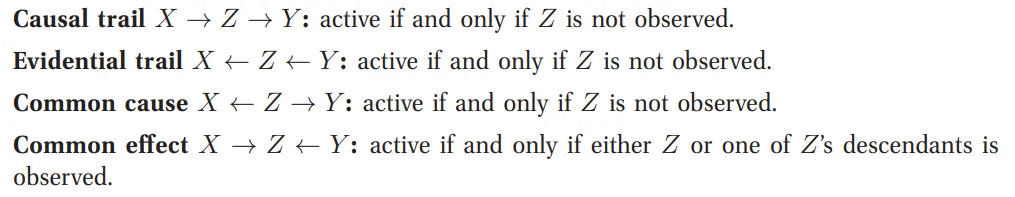

In this notebook, you will implement a Bayesian network from scratch and then, you will check whether two variables are independent given another variable.

# Section 2: Impelementation (100 points)

For this section, your task is to create this Bayes net from scratch by implementing the functions provided below. Make sure to complete all of the defined functions. You are welcome to create additional functions if you feel it would be helpful, but if you make any changes to the existing functions, please provide a comment explaining why.

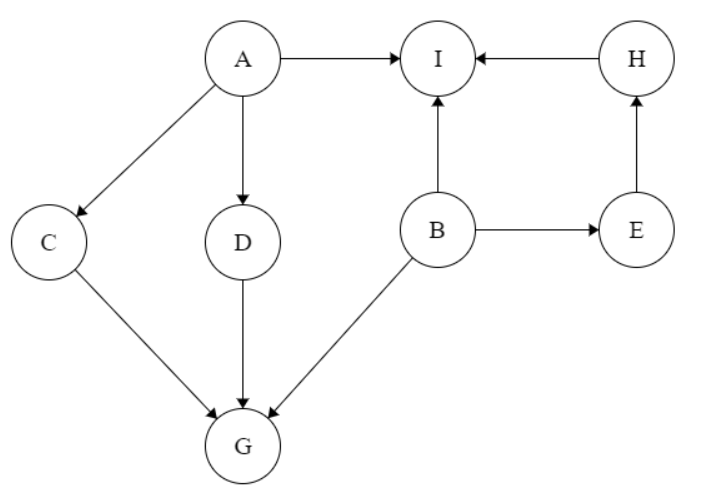

In [89]:
class Node():

  def __init__(self, ID):
    self.ID = ID
    self.list_of_parents = dict()
    self.list_of_children = dict()

  def new_parent(self, node):
    self.list_of_parents[node.ID] = node
  
  def new_child(self, node):
    self.list_of_children[node.ID] = node

In [90]:
import copy

class BayesianNetwork(object):
    def __init__(self):
        self.nodes = dict()

    def add_edge_node(self, edge):
        (parent, child) = edge
        if parent not in self.nodes:
            self.nodes[parent] = Node(ID=parent)
        if child not in self.nodes:
            self.nodes[child] = Node(ID=child)
        parent_ = self.nodes.get(parent)
        child_ = self.nodes.get(child) 
        parent_.new_child(child_)
        child_.new_parent(parent_)

    def observed_ancestors(self, observed):
        visited_nodes = copy.copy(observed)
        obs = set()
        while len(visited_nodes) > 0:
            next = self.nodes[visited_nodes.pop()]
            for parent in next.list_of_parents:
                obs.add(parent)
        return obs

    def check_d_seperation(self, first_node, second_node, observed):
        observed_ancestors_ = self.observed_ancestors(observed)
        via_nodes = [(first_node, "U")]
        visited = set()
        while len(via_nodes) > 0: 
            (node_, direction) = via_nodes.pop()
            node = self.nodes[node_]
            if (node_, direction) not in visited:
                visited.add((node_, direction))
                if node_ not in observed and node_ == second_node:
                    return False
                if direction == "U" and node_ not in observed:
                    for parent in node.list_of_parents:
                        via_nodes.append((parent, "U"))
                    for child in node.list_of_children:
                        via_nodes.append((child, "D"))
                elif direction == "D":
                    if node_ not in observed: 
                        for child in node.list_of_children:
                            via_nodes.append((child, "D"))
                    if node_ in observed or node_ in observed_ancestors_: 
                        for parent in node.list_of_parents:
                            via_nodes.append((parent, "D"))
        return True

# Section 3: Testing

In [91]:
n_nodes = 8
n_edges = 10
n_queries = 6

edges = [
    ['A', 'C'],
    ['A', 'D'],
    ['A', 'I'],
    ['B', 'I'],
    ['B', 'E'],
    ['B', 'G'],
    ['C', 'G'],
    ['D', 'G'],
    ['E', 'H'],
    ['H', 'I']
]

queries = []

queries.append(('A', 'B', ['H']))
queries.append(('C', 'B', ['E']))
queries.append(('G', 'I', ['B']))
queries.append(('B', 'D', ['G']))
queries.append(('H', 'B', ['E', 'I']))
queries.append(('A', 'G', ['B', 'C', 'D']))



BN_ = BayesianNetwork()

for edge in edges:
  BN_.add_edge_node(edge)

for (first_node, second_node, observed_node) in queries:
  print(BN_.check_d_seperation(first_node, second_node, observed_node))


True
True
False
False
False
True


In [92]:
'''
TODO: call check_dseperation for the conditions below:
first node = A, second node = B, observed nodes = H
first node = C, second node = B, observed nodes = E
first node = G, second node = I, observed nodes = B
first node = B, second node = D, observed nodes = G
first node = H, second node = B, observed nodes = E, I
first node = A, second node = G, observed nodes = C, D, B
'''

# sample for visualization

import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import itertools

bn = gum.fastBN("A->I<-H<-E<-B->I;A->D->G<-B;A->C->G");

def powerset(iterable):
    xs = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(xs,n) for n in range(len(xs)+1))

for k in powerset(bn.names()-{'A','G'}):
  if bn.isIndependent('A','G',k):
      print(f"given {k}")

bn

given ('D', 'C')
given ('B', 'D', 'C')
given ('E', 'D', 'C')
given ('H', 'D', 'C')
given ('B', 'E', 'D', 'C')
given ('B', 'I', 'D', 'C')
given ('B', 'H', 'D', 'C')
given ('E', 'H', 'D', 'C')
given ('B', 'E', 'I', 'D', 'C')
given ('B', 'E', 'H', 'D', 'C')
given ('B', 'I', 'H', 'D', 'C')
given ('B', 'E', 'I', 'H', 'D', 'C')


(pyAgrum.BayesNet<double>@0x2a8f370) BN{nodes: 8, arcs: 10, domainSize: 256, dim: 26, mem: 416o}

# Section 4: Questions (10 points)

1. What is the role of d-separation in designing efficient algorithms for inference and learning in graphical models?

answer: d-separation is a powerful concept in graphical models that plays a central role in designing efficient algorithms for inference and learning. It provides a way to identify which parts of the graph need to be considered when computing conditional probabilities or performing other computations, and it can be used to design algorithms for exact inference, approximate inference, and learning in graphical models.

2. Can you provide an example of a real-world problem in which d-separation would be useful in identifying relevant features for predicting the outcome of an event?

answer: if we want to determine whether cholesterol level is relevant for predicting the patient's risk of having a heart attack. We can use d-separation to determine whether there is a path in the Bayesian network between cholesterol level and the patient's risk of having a heart attack that is not blocked by any observed variables. If there is such a path, then cholesterol level is relevant for predicting the patient's risk of having a heart attack, because it provides information that is not already captured by the other variables in the model.
3. What are some other practical applications of d-separation?

answer: Causal inference, Feature selection, Missing data imputation, Network analysis, Robotics, etc.

